In [57]:
img_path = '/mnt/data/raw/images/'
img_id = '10953818'
img_file = 'c5532d69e88e42aa0c381d879c529e2ac78959a8.jpg'

img_filename = '/'.join([img_path, img_id, img_file])
img_filename

'/mnt/data/raw/images//10953818/c5532d69e88e42aa0c381d879c529e2ac78959a8.jpg'

In [87]:
import os
from PIL import Image

# Define the directory containing the images
directory = '/mnt/data/raw/images'

# Initialize an empty list to store image objects
image_objects = []

# Iterate through all subdirectories and files in the directory
for root, dirs, files in os.walk(directory):
    for file in files:
        # Check if the file is an image
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
            # Construct the full path to the image file
            img_filename = os.path.join(root, file)
            try:
                # Open the image file and append the image object to the list
                image = Image.open(img_filename)
                image_objects.append(image)
            except Exception as e:
                print(f"Error processing image {img_filename}: {e}")
                
#print(image_objects)

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=330x220 at 0x7F44E86B8430>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F44E86B8340>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x446 at 0x7F44E3F98970>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F44E3F98A00>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x738 at 0x7F44E3F99060>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x315 at 0x7F44E3F990C0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333 at 0x7F44E8AAFF70>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F44E8AAFFD0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x315 at 0x7F44E8AAFE80>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x951 at 0x7F44E86DDB70>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=323x336 at 0x7F44E89D8430>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x360 at 0x7F44E89D81C0>, <PI

In [88]:
from transformers import pipeline

checkpoint = "google/owlvit-base-patch32"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


In [91]:
detection_results = []


for i, image in enumerate(image_objects[:10]):
    # Call the detector function for the current image
    result = detector(image,candidate_labels=["plant", "leaf"])
    # Check if the result is not an empty array
    if len(result) > 0:
        print('i',i)
        detection_results.append(result)
    else:
        print(f"No labels detected for image {i+1}")


No labels detected for image 1
i 1
No labels detected for image 3
No labels detected for image 4
i 4
No labels detected for image 6
No labels detected for image 7
No labels detected for image 8
No labels detected for image 9
No labels detected for image 10


In [90]:
detection_results

[[{'score': 0.16367098689079285,
   'label': 'plant',
   'box': {'xmin': 40, 'ymin': 0, 'xmax': 596, 'ymax': 445}}],
 [{'score': 0.103033147752285,
   'label': 'plant',
   'box': {'xmin': 21, 'ymin': 22, 'xmax': 578, 'ymax': 698}}]]

[{'score': 0.16367098689079285, 'label': 'plant', 'box': {'xmin': 40, 'ymin': 0, 'xmax': 596, 'ymax': 445}}]


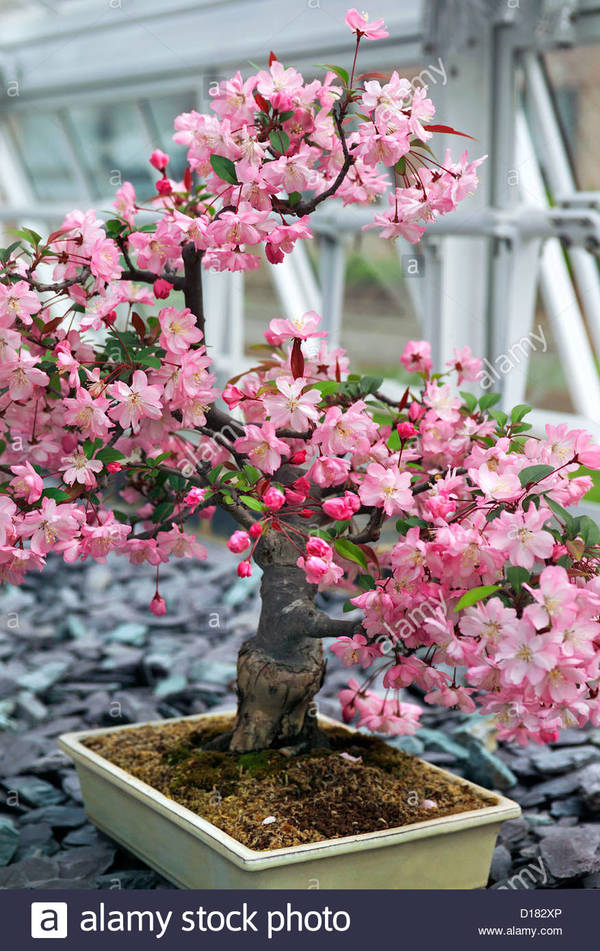

In [93]:
from PIL import ImageDraw

draw = ImageDraw.Draw(image_objects[2])
print(detection_results[0])

for prediction in detection_results[0]:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]

    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="white")

image